# Intel Sensor Data
<img src="lab.png">

In [75]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np


## Read coordinates

In [76]:
coord = pd.read_table("./coord.csv", sep=" ", names=["x", "y"], header=None, index_col=0)
coord.head()

,x,y
1,426,346
2,374,293
3,471,276
4,412,223
5,373,180


## Creating the data frame

In [142]:
columns = ["date", "time", "epoch", "id", "temperature", "humidity", "light", "voltage"]
df = pd.read_table("./data.txt", header=None, names=columns, sep=" ", parse_dates=[[0, 1]])
df.set_index('date_time', inplace=True)
#df.index.name = None
df.sort_index(inplace=True)
df_max = df.max()
df_min = df.min()
df.describe()

,epoch,id,temperature,humidity,light,voltage
count,2313682.00000,2313156.000000,2312781.000000,2312780.000000,2219804.000000,2313156.000000
mean,33039.93137,28.544124,39.207001,33.908143,407.211000,2.492552
std,18368.52381,50.624083,37.419227,17.321524,539.427648,0.179574
min,0.00000,1.000000,-38.400000,-8983.130000,0.000000,0.009101
25%,17572.00000,17.000000,20.409800,31.877600,39.560000,2.385220
50%,33327.00000,29.000000,22.438400,39.280300,158.240000,2.527320
75%,47789.00000,41.000000,27.024800,43.585500,537.280000,2.627960
max,65535.00000,65407.000000,385.568000,137.512000,1847.360000,18.560000


## Data Cleaning

* Remove rows with all NaNs and replace single NaN by corresponding values 

## Take subset for initial analysis

,epoch,id,temperature,humidity,light,voltage
date_time,,,,,,
2004-02-28 00:59:16.027850,3,1,19.9884,37.0933,45.08,2.69964
2004-02-28 00:59:16.175410,3,25,19.4494,37.8477,97.52,2.69964
2004-02-28 00:59:16.482912,3,28,18.9202,40.5004,NaN,2.80151
2004-02-28 00:59:16.521007,3,23,20.2432,36.3362,235.52,2.69964
2004-02-28 00:59:16.711581,3,18,19.2534,38.1897,57.04,2.50599
2004-02-28 00:59:16.749921,3,27,20.0276,37.4708,79.12,2.69964
2004-02-28 00:59:16.790067,3,32,19.1162,39.1783,114.08,2.69964
2004-02-28 00:59:16.853347,3,22,19.6356,37.0246,82.80,2.65143
2004-02-28 00:59:16.933957,3,24,19.6356,37.3336,143.52,2.71196


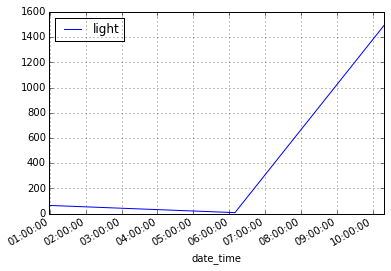

In [87]:
import datetime as dt
start = df.index.searchsorted(dt.datetime(2004, 2, 28))
end = df.index.searchsorted(dt.datetime(2004, 2, 29))
df_small = df.ix[start:end]

df_small[df_small["epoch"]==3].plot(y="light")
df_small[df_small["epoch"]==3]

3 (255, 0, 0, 100)


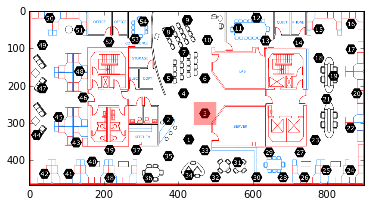

In [153]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

def rect(draw, xy, diff=30, color=(255, 0, 0, 100)):
        draw.rectangle((tuple(xy-diff), tuple(xy+diff)), fill=color)
        
def to_color(key, val):
    return int((val - df_min[key]) / df_max[key] * 255)

def color_iterator(key=None, values=None):
    if values and key:
        for val in values:
            yield (to_color(key, val), 0, 0, 100)
    else:
        while True:
            yield (255, 0, 0, 100)

def highlight_node(ids, key=None, values=None):
    if type(ids) in [int, float]:
        ids = [ids]
        
    im = Image.open("lab.png")
    draw = ImageDraw.Draw(im, 'RGBA')
    for id_, col in zip(ids, color_iterator(key=key, values=values)):
        rect(draw, coord.ix[int(id_)].values, color=col)
    imshow(np.asarray(im))

highlight_node(3)


## Inspect daily pattern

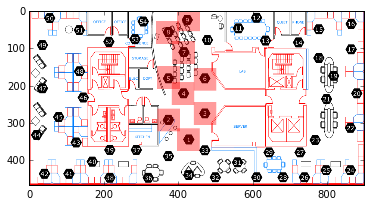

In [125]:
from ggplot import *
highlight_node(range(1,10))
df_small=df[df["id"]<10]["20040301":"20040310"]

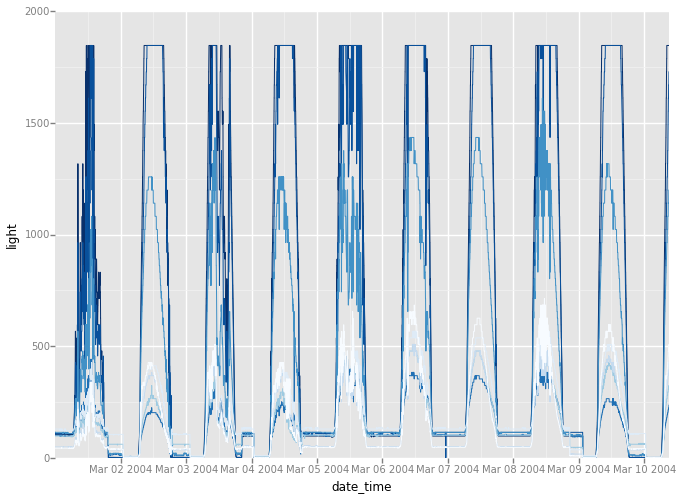

<ggplot: (-9223363272855648361)>

In [126]:
ggplot(aes(x='date_time', y='light', color='id'), data=df_small.reset_index(), ) +\
    geom_line() #+ scale_color_brewer(type = 'qual', palette = 'Paired') doesn't work :(

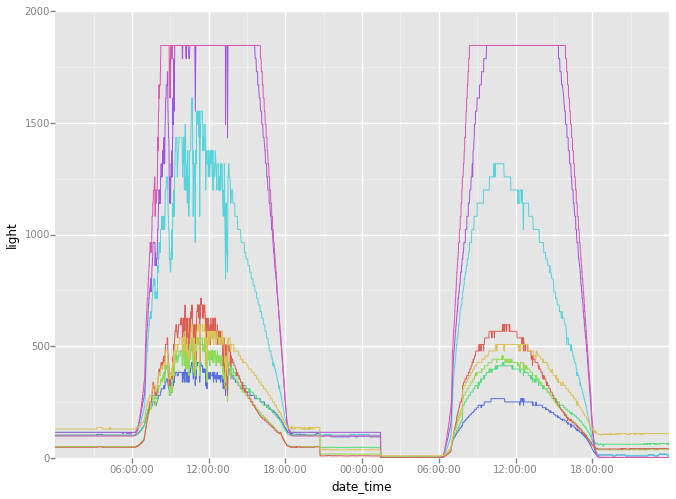

<ggplot: (-9223363272905174233)>

In [129]:
df_very_small=df[df["id"]<10]["20040308":"20040309"]
ggplot(aes(x='date_time', y='light', color='id'), data=df_very_small.reset_index(), ) +\
    geom_line() 

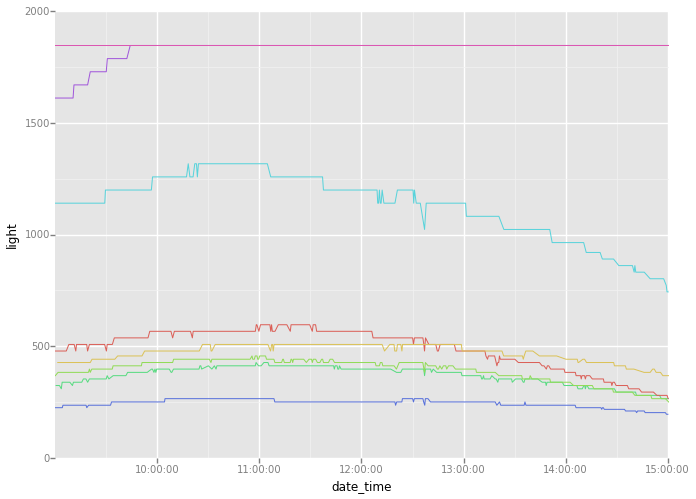

<ggplot: (8763948158717)>

In [132]:
df_very_small=df[df["id"]<10]["20040309 09:00":"20040309 15:00"]
ggplot(aes(x='date_time', y='light', color='id'), data=df_very_small.reset_index(), ) +\
    geom_line() 

1.0 (68, 0, 0, 100)
9.0 (65, 0, 0, 100)
3.0 (54, 0, 0, 100)
6.0 (50, 0, 0, 100)
7.0 (157, 0, 0, 100)
8.0 (33, 0, 0, 100)
4.0 (252, 0, 0, 100)
2.0 (254, 0, 0, 100)


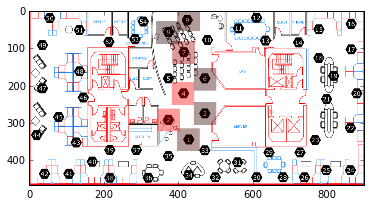

In [154]:
light_values = tuple(df_very_small[["id", "light"]].groupby("id").aggregate(np.mean)["light"].values)
ids = tuple(df_very_small.id.unique())

highlight_node(ids, key="light", values=light_values)

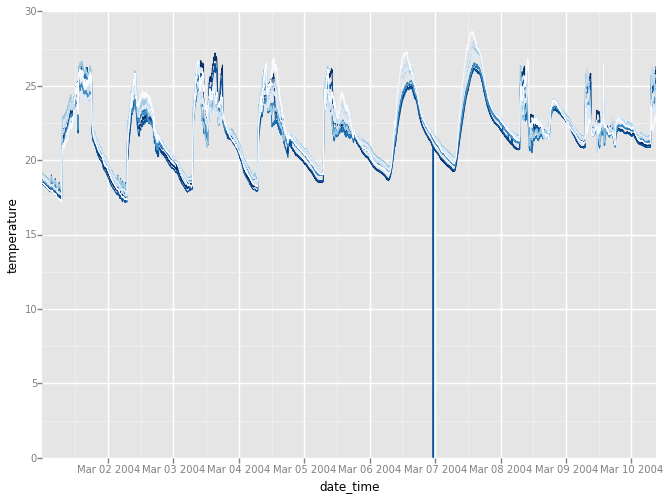

<ggplot: (-9223363272906731404)>

In [118]:
ggplot(df_small.reset_index(), aes(x='date_time', y="temperature", color="id")) +\
    geom_line()

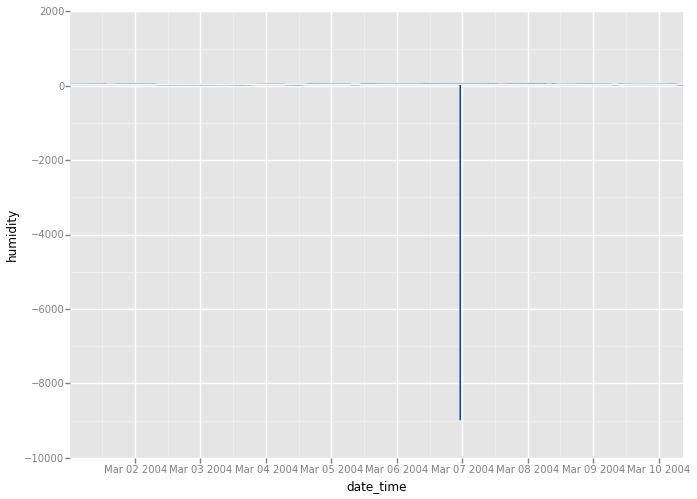

<ggplot: (8763948442481)>

In [119]:
ggplot(df_small.reset_index(), aes(x='date_time', y="humidity", color="id")) +\
    geom_line()

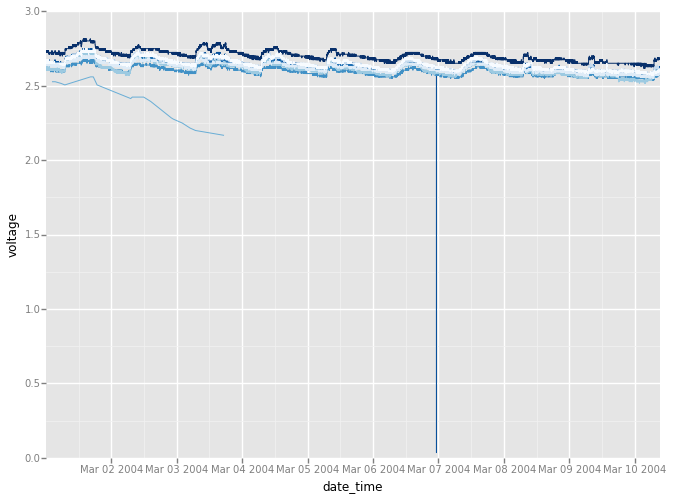

<ggplot: (8763949891855)>

In [120]:
ggplot(df_small.reset_index(), aes(x='date_time', y="voltage", color="id")) +\
    geom_line()

## Voronoi Diagram

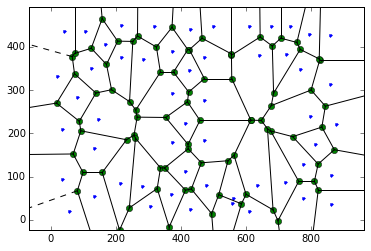

In [107]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(coord.values)
voronoi_plot_2d(vor)
plt.show()

## Trash

In [57]:
class Point:
    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)
    def _check(self, p2):
        if type(p2) != type(self):
            raise Exception("Wrong Type! p2 is {}".format(type(p2)))
    def __add__(self, p2):
        return self._domagic("__add__", p2)
    def __sub__(self, p2):
        return self._domagic("__sub__", p2)
    def __mul__(self, p2):
        return self._domagic("__mul__", p2)        
    def __div__(self, p2):
        return self._domagic("__div__", p2)        
    def __truediv__(self, p2):
        return self._domagic("__truediv__", p2)
    def __repr__(self):
        return "Point({}, {})".format(self.x, self.y)
    def __str__(self):
        return "Point({}, {})".format(self.x, self.y)
    def __eq__(self, p2):
        return self.x == p2.x and self.y == p2.y
    def __ne__(self, p2):
        return self.x != p2.x and self.y != p2.y
    def _domagic(self, name, p2):
        funx = getattr(self.x, name, None)
        funy = getattr(self.y, name, None)
        if type(p2) == type(self):
            return Point(funx(p2.x), funy(p2.y))
        else:
            return Point(funx(p2), funy(p2))
    def out(self):
        return (self.x, self.y)
    
real_id1 = Point(427, 346)
real_id2 = Point(370, 291)
real_diff = real_id2 - real_id1
id1 = Point(coord.at[1, "x"], coord.at[1, "y"])
id2 = Point(coord.at[2, "x"], coord.at[2, "y"])
diff = id2 - id1
slope = real_diff / diff
intercept = real_id1 - id1 * slope
transform=lambda a: slope * a + intercept
transformx=lambda x: slope.x * x + intercept.x
transformy=lambda y: slope.y * y + intercept.y

transform(id2) == real_id2 and transform(id1) == real_id1

True

In [ ]:
im = Image.open("lab.png")
draw = ImageDraw.Draw(im, 'RGBA')
field=lambda p: ((transform(p)+30).out(), (transform(p)-30).out())
draw.rectangle(field(id1), fill=(255, 0,0 ,100))
imshow(np.asarray(im))

In [55]:
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()*2

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all([v >= 0 for v in vertices]):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

regions, vertices = voronoi_finite_polygons_2d(vor)
for reg in regions:
    print(vertices[reg])

[[ 421.67183771  393.61217184]
 [ 377.57692308  341.5       ]
 [ 424.43278008  295.52821577]
 [ 472.61111111  326.5       ]
 [ 426.44754332  393.51163067]]
[[ 424.43278008  295.52821577]
 [ 420.46907552  272.91178385]
 [ 353.7172319   236.67506874]
 [ 265.66409564  237.45430004]
 [ 261.35989717  253.95372751]
 [ 337.23333333  341.5       ]
 [ 377.57692308  341.5       ]]
[[ 615.14634146  230.        ]
 [ 459.01694915  230.        ]
 [ 420.46907552  272.91178385]
 [ 424.43278008  295.52821577]
 [ 472.61111111  326.5       ]
 [ 556.91764706  326.5       ]
 [ 615.67984755  230.44640305]]
[[ 422.30754066  174.46525382]
 [ 353.7172319   236.67506874]
 [ 420.46907552  272.91178385]
 [ 459.01694915  230.        ]]
[[ 422.7191679   164.38038633]
 [ 422.30754066  174.46525382]
 [ 353.7172319   236.67506874]
 [ 265.66409564  237.45430004]
 [ 256.12187427  196.22470203]
 [ 260.55584551  188.72468685]
 [ 337.50934579  120.07009346]
 [ 349.97301276  119.86408243]]
[[ 563.90121483  149.19037724]
 [ 

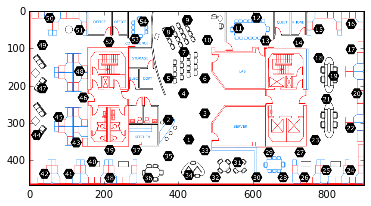

In [59]:
im2 = Image.open("lab.png")
draw = ImageDraw.Draw(im2, 'RGBA')
for region in regions:
    draw.polygon(vertices[region], outline="black", fill="green")
imshow(np.asarray(im2))